In [21]:
import matplotlib.pyplot as plt
import autograd.numpy as np
import autograd
from autograd.misc.optimizers import adam

In [22]:
def initialize_nn(scale, n_neurons_per_layer):
    params = []
    for i, j in zip(n_neurons_per_layer[:-1], n_neurons_per_layer[1:]):
        params.append((np.random.randn(i, j)*scale, np.random.randn(j)*scale))
    return params

def psi(nn_params, inputs):
    for W, b in nn_params:
        outputs = np.dot(inputs, W) + b
        inputs = np.tanh(outputs)
    return outputs

psi_x = autograd.elementwise_grad(psi, 1)
psi_xx = autograd.elementwise_grad(psi_x, 1)

In [30]:
n_neurons_per_layer=[1, 40, 1]
nn_params = initialize_nn(0.1, n_neurons_per_layer)

params = {'nn_params': nn_params}
L = 1
x = np.linspace(0, L, 50)[:, None]

def loss_function(params, step):
    nn_params = params['nn_params']

    H = - psi_xx(nn_params, x)
    
    bc0 = psi(nn_params, 0.0)
    bc1 = psi(nn_params, L)

    psi_sq = psi(nn_params, x)**2

    I = np.sum((psi_sq[1:] + psi_sq[0:-1]) / 2 * (x[1:] - x[0:-1]))

    A = psi(nn_params, x) * H
    E = np.sum((A[1:] + A[0:-1]) / 2 * (x[1:] - x[0:-1]))/I

    first_term = H - E * psi(nn_params, x) 

    loss = np.mean(first_term**2) + bc0**2 + bc1**2 + (1.0 - I)**2

    return loss

def callback(params, step, g):
    if step % 100 == 0:
        print("Epoch : {0:3d}, loss : {1}".format(step, loss_function(params, step)[0][0]))

In [31]:
params = adam(autograd.grad(loss_function), params, step_size=0.01, num_iters=500, callback=callback)

Epoch :   0, loss : 1.001095504533892
Epoch : 100, loss : 0.5085559198622396
Epoch : 200, loss : 0.01936304212953765
Epoch : 300, loss : 0.0063358387081925
Epoch : 400, loss : 0.0031025449065058795


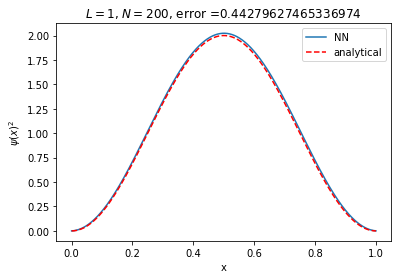

In [32]:
N = 1000
x = np.linspace(0, L, N)[:, None]
y = psi(params['nn_params'], x)
error = 1/N*np.sum(y**2 - (np.sqrt(2/L)*np.sin(np.pi* x/L))**2)**2
plt.plot(x, y**2, label='NN')
plt.plot(x, (np.sqrt(2/L)*np.sin(np.pi* x/L))**2, 'r--', label='analytical')
plt.ylabel('$\psi(x)^2$')
plt.xlabel('x')
plt.title('$L=1$, $N=200$, error =' + str(error))
plt.legend()
plt.show()